In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import time
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [5]:
data_tw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4148 entries, 2005-01-03 to 2021-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  4148 non-null   float64
 1   label      4148 non-null   int64  
 2   3ma        4148 non-null   float64
 3   11ma       4148 non-null   float64
 4   3-11MACD   4148 non-null   float64
 5   MACD_6     4148 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 226.8 KB


C:\Users\LEGION~1\AppData\Local\Temp/ipykernel_20772/1206527729.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ann_12_after'] = y_predict
C:\Users\LEGION~1\AppData\Local\Temp/ipykernel_20772/1206527729.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['ann_signal'] = 0
c:\python\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

NameError: name 'count_money_macd' is not defined

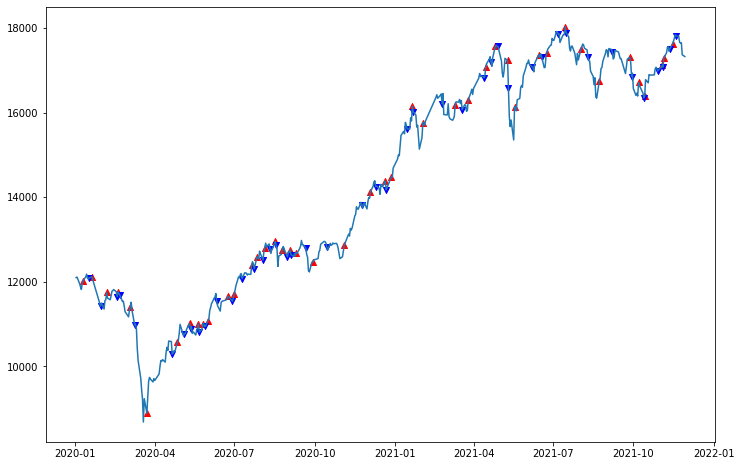

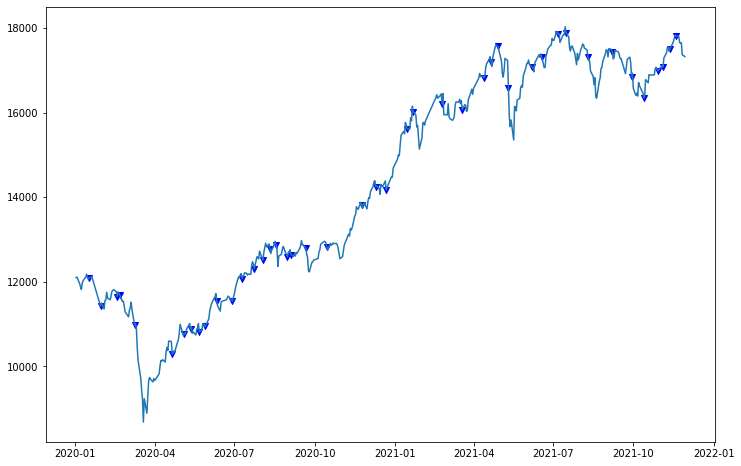

In [4]:
predict_data = []
for i in range(36, data_for_predict.shape[0]):
    predict_data.append(data_for_predict.iloc[i - 36:i - 12, 0])
predict_data = np.array(predict_data)

y_predict = ann_regr.predict(predict_data)
data['ann_12_after'] = y_predict

data['ann_signal'] = 0
for i in range(data.shape[0]):
    if data.iloc[i, 9] - data.iloc[i, 0] > 0:
        data.iloc[i, 10] = 1
    elif data.iloc[i, 9] - data.iloc[i, 0] < 0:
        data.iloc[i, 10] = -1
        
buy = data_2020['signal'] == 1
sell = data_2020['signal'] == -1
buy_up_trend = (data_2020['signal'] == 1) & (data_2020['ann_signal'] == 1)
sell_down_trend = (data_2020['signal'] == -1) & (data_2020['ann_signal'] == -1)

plt.figure(figsize = (12, 8))
plt.plot(data_2020['Adj Close'])
plt.scatter(x = data_2020[buy].index, y = np.array((data_2020[buy])['Adj Close']), marker = '^', color = 'red')
plt.scatter(x = data_2020[sell].index, y = np.array((data_2020[sell])['Adj Close']), marker = 'v', color = 'blue')

plt.figure(figsize = (12, 8))
plt.plot(data_2020['Adj Close'])
plt.scatter(x = data_2020[buy_up_trend].index, y = np.array((data_2020[buy_up_trend])['Adj Close']), marker = '^', color = 'red')
plt.scatter(x = data_2020[sell_down_trend].index, y = np.array((data_2020[sell_down_trend])['Adj Close']), marker = 'v', color = 'blue')

count_money_macd(data_2020)
count_money_pstrategy(data_2020)

money = 100
index = 0
strategy = 0
while index < data_2020.shape[0]:
    tmp = data_2020.iloc[index, 8]
    if tmp == 1:
        if strategy == 0:
            strategy = 1
            price = data_2020.iloc[index, 0]
        elif strategy == -1:
            strategy = 0
            money *= ((data_2020.iloc[index, 0] - price)/ price + 1)
            price = 0
    elif tmp == -1:
        if strategy == 1:
            strategy = 0
            money *= ((data_2020.iloc[index, 0] - price)/ price + 1)
            price = 0
        elif strategy == 0:
            strategy = -1
            price = data_2020.iloc[index, 0]
    index += 1
print(f'MACD strategy : {money}')

money = 100
index = 0
strategy = 0
while index < data_2020.shape[0]:
    tmp = data_2020.iloc[index, 8]
    mask = data_2020.iloc[index, 10]
    if tmp == 1 and mask == 1:
        if strategy == 0:
            strategy = 1
            price = data_2020.iloc[index, 0]
        elif strategy == -1:
            strategy = 0
            money *= ((data_2020.iloc[index, 0] - price)/ price + 1)
            price = 0
    elif tmp == -1 and mask == -1:
        if strategy == 1:
            strategy = 0
            money *= ((data_2020.iloc[index, 0] - price)/ price + 1)
            price = 0
        elif strategy == 0:
            strategy = -1
            price = data_2020.iloc[index, 0]
    index += 1
print(f'paper strategy : {money}')

In [17]:
data_2020

,Adj Close,label,3ma,11ma,3-11MACD,MACD_6,log_return,strategy,signal,ann_12_after,ann_signal
Date,,,,,,,,,,,
2020-01-02,12100.48047,0,12061.976634,12006.219571,55.757063,62.688324,0.008577,-6.931261,0,9.996164,-1
2020-01-03,12110.42969,0,12086.203162,12023.587924,62.615238,62.667442,0.000822,-0.052204,0,9.996164,-1
2020-01-06,11953.36035,0,12019.781756,12011.883329,7.898427,47.019152,-0.013055,-39.120725,0,9.996164,-1
2020-01-07,11880.32031,0,11950.051033,11989.956159,-39.905126,22.183644,-0.006129,-62.088770,0,9.996164,-1
2020-01-08,11817.09961,0,11883.575321,11961.146734,-77.571412,-6.317801,-0.005336,-71.253612,0,9.996164,-1
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,17666.11914,0,17732.348330,17631.204786,101.143544,169.289556,-0.007749,-68.146012,0,9.996164,-1
2021-11-24,17642.51953,0,17687.433930,17633.090576,54.343353,136.447784,-0.001337,-82.104430,0,9.996164,-1
2021-11-25,17654.18945,0,17670.811690,17636.607055,34.204635,107.235455,0.000661,-73.030821,0,9.996164,-1


In [15]:
def count_money_pstrategy(x):
    money = 100
    index = 0
    strategy = 0
    while index < x.shape[0]:
        tmp = x.iloc[index, 8]
        mask = x.iloc[index, 10]
        if tmp == 1 and mask == 1:
            if strategy == 0:
                strategy = 1
                price = x.iloc[index, 0]
                print(money)
            elif strategy == -1:
                strategy = 0
                money *= ((x.iloc[index, 0] - price)/ price + 1)
                price = 0
                print(money)
        elif tmp == -1 and mask == -1:
            if strategy == 1:
                strategy = 0
                money *= ((x.iloc[index, 0] - price)/ price + 1)
                price = 0
                print(money)
            elif strategy == 0:
                strategy = -1
                price = x.iloc[index, 0]
                print(money)
        index += 1
    print(f'paper strategy earn : {money}')

def count_money_macd(x):
    money = 100
    index = 0
    strategy = 0
    while index < data_2020.shape[0]:
        tmp = data_2020.iloc[index, 8]
        if tmp == 1:
            if strategy == 0:
                strategy = 1
                price = data_2020.iloc[index, 0]
            elif strategy == -1:
                strategy = 0
                money *= ((data_2020.iloc[index, 0] - price)/ price + 1)
                price = 0
        elif tmp == -1:
            if strategy == 1:
                strategy = 0
                money *= ((data_2020.iloc[index, 0] - price)/ price + 1)
                price = 0
            elif strategy == 0:
                strategy = -1
                price = data_2020.iloc[index, 0]
        index += 1
    print(f'MACD strategy earn : {money}')